Pythonの<code>geoplot</code>のチュートリアルを動かしてみます。  
なお、多少冗長に書き直しています。  

参考: https://nbviewer.jupyter.org/github/ResidentMario/geoplot/blob/master/notebooks/tutorials/Quickstart.ipynb  

本ノートブックで利用する<code>geopandas</code>や<code>geoplot</code>は<code>anaconda (conda install)</code>で入れた方が良いと思います。  
<code>geoplot</code>は<code>pip</code>でも頑張れば入れられるらしいですが、私には無理でした。  
一方<code>quilt</code>は<code>pip</code>のみ対応しています。

# 準備

In [ ]:
# 本ノートブックで利用するライブラリをインストールするには、このセルのコマンドを実行します
# ! conda install geopandas
# ! conda install geoplot
# ! pip install quilt

In [30]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt

# plt.show()を自動的にしてくれる
%matplotlib inline 

ここでは<code>GeoDataFrame</code>形式に格納されたのデータを扱います。この形式は基本的には<code>pandas</code>の<code>DataFrame</code>と一緒です。  
違いは<code>shapely.geometry</code>型のデータを持つことを明記しているかどうかくらいです。  
この型は空間中の点やポリゴンの情報などを表現しています。

データセットを用意します。  
ここで、チュートリアルではいきなり   
<code>from quilt.data.ResidentMario import geoplot_data</code>  
としていますが、これでは通りません。  
下のセルのように実行します。  
参考: https://github.com/ResidentMario/geoplot/issues/41#issuecomment-341594813

In [3]:
import quilt
quilt.install("ResidentMario/geoplot_data")
from quilt.data.ResidentMario import geoplot_data

  0%|          | 0.00/42.4M [00:00<?, ?B/s]

100%|██████████| 42.4M/42.4M [00:03<00:00, 13.5MB/s]


# アメリカの都市人口プロット

アメリカの都市を、その人口の大きさに基づいてプロットしてみましょう。

アメリカの人口10万以上の都市の情報を得ます。

In [4]:
continental_cities=gpd.read_file(geoplot_data.usa_cities()).query("POP_2010 > 100000")
print("continental_cities.shape = ", continental_cities.shape)
continental_cities.head()

continental_cities.shape =  (284, 5)


,id,POP_2010,ELEV_IN_FT,STATE,geometry
3,177,105549.0,902.0,ND,POINT (-96.78980339999998 46.87718630000012)
30,373,210565.0,505.0,NY,POINT (-77.61555679999998 43.15478450000012)
34,378,145170.0,397.0,NY,POINT (-76.14742439999998 43.04812210000017)
39,386,261310.0,600.0,NY,POINT (-78.87836889999994 42.8864468000001)
61,426,106519.0,118.0,MA,POINT (-71.31617179999989 42.63342470000003)


<注意>ここで<code>geopandas</code>や<code>geoplot</code>では座標の値は（経度、緯度）の順で持っていますので、プロットの位置がおかしいと感じたらまずそこを確認しましょう。  

それでは、<code>geoplot.pointplot()</code>で点をプロットしてみます。  
引数には<code>shapely.geometry.point.Point</code>をデータフレームとして格納したものを入れます。

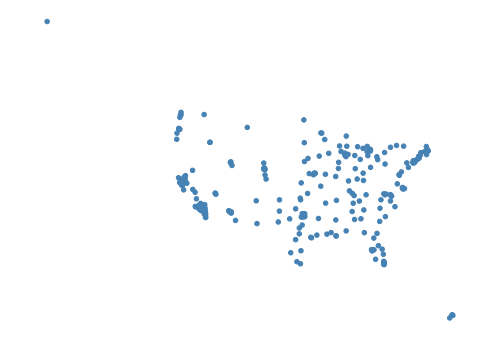

In [16]:
gplt.pointplot(continental_cities)

点のプロット自体はできました。  
より場所を分かりやすくするために、アメリカの地図（州の境界線付き）上にプロットしてみましょう。  
各州の情報を得ます。

In [6]:
contiguous_usa=gpd.read_file(geoplot_data.contiguous_usa())
print("contiguous_cities.shape = ", contiguous_usa.shape)
contiguous_usa.head()

contiguous_cities.shape =  (49, 4)


,id,adm1_code,State,geometry
0,0,USA-3514,Minnesota,"POLYGON ((-89.59940899999999 48.010274, -89.48..."
1,1,USA-3515,Montana,"POLYGON ((-111.194189 44.561156, -111.291548 4..."
2,2,USA-3516,North Dakota,"POLYGON ((-96.601359 46.351357, -96.5389080000..."
3,4,USA-3518,Idaho,"POLYGON ((-111.049728 44.488163, -111.050245 4..."
4,5,USA-3519,Washington,"POLYGON ((-116.998073 46.33017, -116.906528 46..."


<code>geoplot.polyplot()</code>でポリゴンをプロットできます。  
引数には<code>shapely.geometry.polygon.Polygon</code>をデータフレームの形に格納したものを入れます。

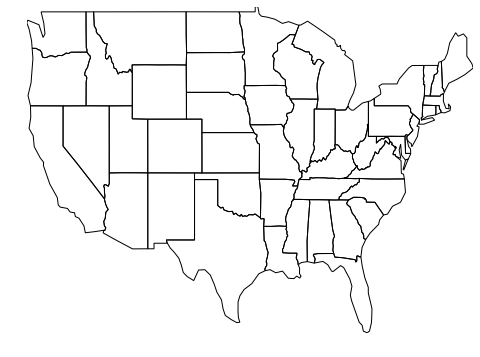

In [7]:
gplt.polyplot(contiguous_usa)

確かにアメリカの地図を表示できました。  
それではこの地図上に上の点群をプロットします。

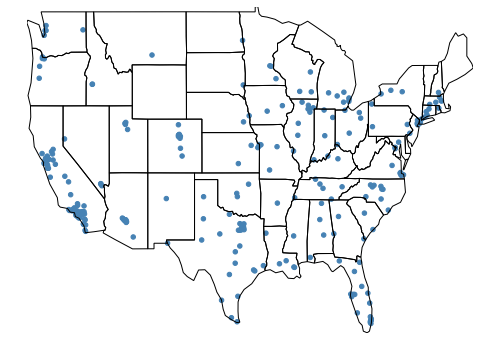

In [32]:
ax=gplt.polyplot(contiguous_usa)
gplt.pointplot(continental_cities,ax=ax)

確かにプロットできました。  
人口10万人以上の都市は南西と北東部に多いように見えます。

プロットはできたのですが、このアメリカの形は少し奇妙です。  
地球儀で見たものと違う気がします。  
というのも、球体上にあるものを平面状に投影すると形が変わってしまいます。  特にこれまでやってきた方法は雑な投影をしてしまっています。。。  
代わりにアメリカの地図を描くときにより一般的なアルベルス正積円錐図法(Albers equal area projection)で描いてみましょう。

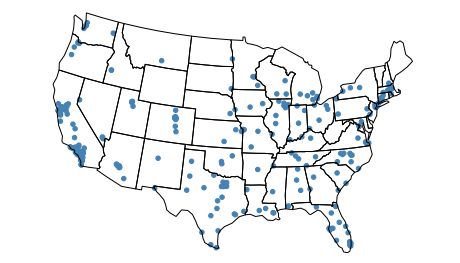

In [33]:
proj=gcrs.AlbersEqualArea()
ax=gplt.polyplot(contiguous_usa,projection=proj)
gplt.pointplot(continental_cities,ax=ax,projection=proj)

よりいつものアメリカの形に投影できました。  
この他にもさまざまな投影手法が<code>geoplot.crs</code>に実装されています。

<code>geoplot</code>ではこの他にも様々なカスタマイズができます。  
下のセルでは各都市を、人口の大きさに比例した大きさの丸で表示します。

Text(0.5, 1.0, 'Cities in the contiguous United States, 2010')

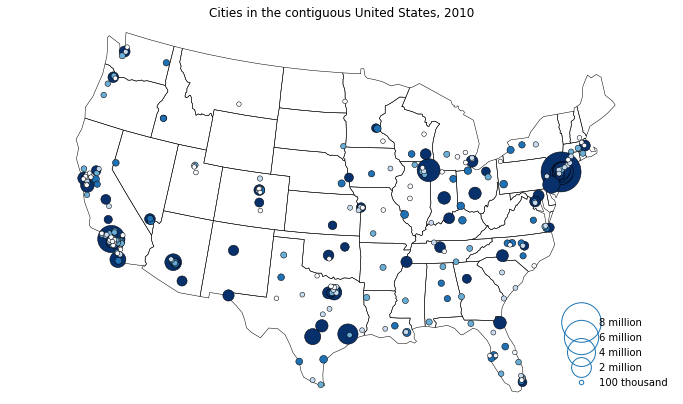

In [48]:
proj=gcrs.AlbersEqualArea()
ax=gplt.polyplot(contiguous_usa,
                projection=proj,
                zorder=-1,
                linewidth=0.5,
                figsize=(12,12))

gplt.pointplot(continental_cities,
               # 円の大きさ・色見・淵の線に関するパラメータ
              scale="POP_2010", # 円の大きさの基準
              limits=(1,80), # 描画する円の大きさは、最大でも最小のものの80倍とする
              hue="POP_2010", # 円の色見の基準
              cmap="Blues", # 色のグラデーションの基準色
              k=5, # 色は何段階の濃さにするか
              linewidth=0.5, # 円の淵の線の太さ
              edgecolor="black", # 円の淵の線の色
               # 凡例
              legend=True, # 凡例の表示するかどうか
              legend_var="scale", # 凡例の大きさの基準
              legend_values=[8000000,6000000,4000000,2000000,100000], # 凡例の値の範囲
              legend_labels=["8 million","6 million","4 million","2 million", "100 thousand"], # 凡例のラベル、範囲と対応
              legend_kwargs={"frameon":False, # 凡例の部分の枠線ありかなしか
                             "loc":"lower right"}, # 凡例の位置
              
               ax=ax,projection=proj)
ax.set_ylim((-1597757, 1457718)) # 地図の範囲南北端

plt.title("Cities in the contiguous United States, 2010")

確かに大きさの異なる円を描けました。  
サンフランシスコ、ロサンゼルス、シカゴ、ニューヨークあたりが大きいですね。直観とも沿っています。

# ニューヨーク

ニューヨーク交通事故のあった箇所をプロットしてみましょう。

In [53]:
collisions=gpd.read_file(geoplot_data.nyc_collision_factors())
print("collisions.shape = ",collisions.shape)
collisions.head(3)

collisions.shape =  (7303, 31)


,id,ON STREET NAME,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 3,NUMBER OF CYCLIST INJURED,LONGITUDE,OFF STREET NAME,VEHICLE TYPE CODE 4,LATITUDE,LOCATION,...,ZIP CODE,VEHICLE TYPE CODE 3,NUMBER OF CYCLIST KILLED,DATE,UNIQUE KEY,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 5,TIME,NUMBER OF PEDESTRIANS INJURED,geometry
0,18,WORTMAN AVENUE,0,None,0,-73.872007,None,None,40.662514,"(40.6625139, -73.8720068)",...,11208.0,None,0,11/10/2016,3559576,None,None,16:11:00,0,POINT (-73.87200679999999 40.66251389999999)
1,21,HUBERT STREET,0,None,0,-74.008344,None,None,40.721323,"(40.7213228, -74.0083444)",...,10013.0,None,0,11/10/2016,3557391,None,None,05:11:00,1,POINT (-74.0083444 40.7213228)
2,69,HENRY STREET,0,None,0,-73.997563,None,None,40.687999,"(40.6879989, -73.9975625)",...,11201.0,None,0,04/16/2016,3419378,None,None,09:15:00,0,POINT (-73.9975625 40.6879989)


In [69]:
injurious_collisions=gpd.read_file(geoplot_data.nyc_injurious_collisions())
print("injurious_collisions.shape = ",injurious_collisions.shape)
injurious_collisions.head(3)

injurious_collisions.shape =  (20644, 4)


,id,NUMBER OF PERSONS INJURED,BOROUGH,geometry
0,11,1,BROOKLYN,POINT (-73.94268479999999 40.676495)
1,21,1,MANHATTAN,POINT (-74.0083444 40.7213228)
2,27,1,BROOKLYN,POINT (-73.9707643 40.6876384)


In [66]:
boroughs=gpd.read_file(geoplot_data.nyc_boroughs())
print("boroughs.shape = ",boroughs.shape)
boroughs.head(3)

boroughs.shape =  (5, 5)


,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330385.03697,1.623853e+09,(POLYGON ((-74.05050806403247 40.5664220341608...
1,4,Queens,861038.47930,3.049947e+09,(POLYGON ((-73.83668274106708 40.5949466970158...
2,3,Brooklyn,726568.94634,1.959432e+09,(POLYGON ((-73.8670614947212 40.58208797679338...


それではプロットしてみましょう。

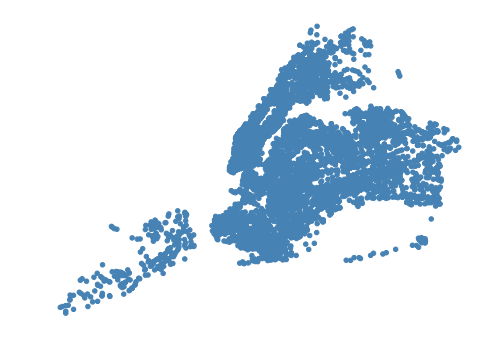

In [59]:
gplt.pointplot(collisions)

そもそも交通事故の件数が多すぎて把握できませんね。  
件数に基づいてグラデーションで表示してみましょう。

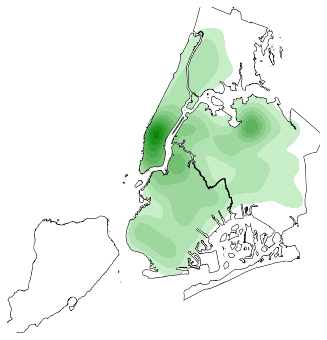

In [70]:
proj=gcrs.AlbersEqualArea()
ax=gplt.polyplot(boroughs,projection=proj)
gplt.kdeplot(collisions,ax=ax,
             shade=True,
             shade_lowest=False,
             clip=boroughs.geometry,
             color="green",
             projection=proj)

<code>geoplot.voronoi</code>でも同様のことができます。

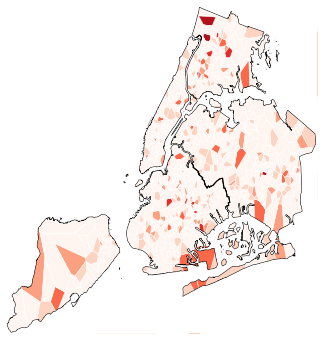

In [84]:
#ax=gplt.polyplot(boroughs,linewidth=1,edgecolor="black",projection=proj)

ax=gplt.voronoi(injurious_collisions.head(1000),
                        hue="NUMBER OF PERSONS INJURED",
                        cmap="Reds",
                        edgecolor="white",
                        clip=boroughs.geometry,
                        linewidth=0.5,
                        categorical=True,
                        #ax=ax,
                        projection=proj
                        )

gplt.polyplot(boroughs,linewidth=1,ax=ax,projection=proj)


In [57]:
census_tracts=gpd.read_file(geoplot_data.ny_census_partial())
print("census_tracks.shape = ",census_tracts.shape)
census_tracts.head(3)

census_tracks.shape =  (67, 4)


,id,POP2000,WHITE,geometry
0,0,111931,105782,"POLYGON ((-74.712396 44.953008, -74.7111320000..."
1,1,79894,74562,"POLYGON ((-74.025026 44.980036, -74.0274011055..."
2,2,51134,42970,"POLYGON ((-74.025026 44.980036, -74.021078 44...."


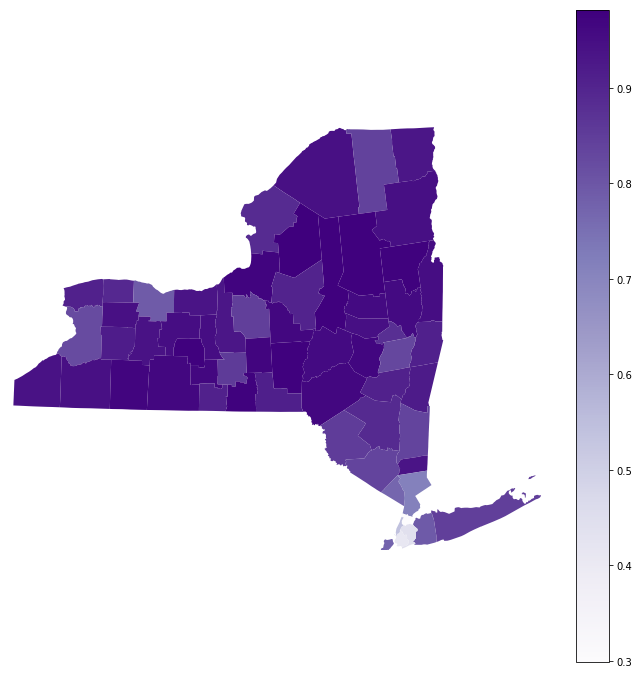

In [85]:
census_tracts = gpd.read_file(geoplot_data.ny_census_partial())
percent_white = census_tracts['WHITE'] / census_tracts['POP2000']

gplt.choropleth(census_tracts, 
                hue=percent_white,  # Display data, passed as a Series
                projection=gcrs.AlbersEqualArea(),
                cmap='Purples', 
                linewidth=0.5, 
                k=None,  # Do not bin our counties.
                legend=True,
                figsize=(12, 12))

KeyError: 'Obesity Rate'

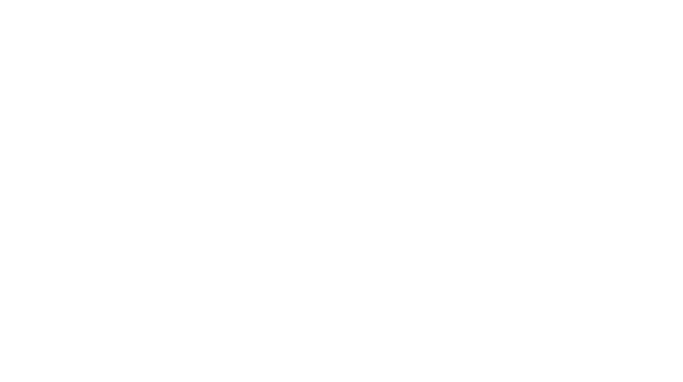

In [86]:
gplt.cartogram(contiguous_usa, scale='Obesity Rate',
               projection=gcrs.AlbersEqualArea(central_longitude=-98, central_latitude=39.5),
               limits=(0.75, 1),
               linewidth=0.5, 
               facecolor='Tomato',
               trace_kwargs={'linewidth': 0.5},
               figsize=(12, 12))

In [87]:
gplt.sankey(la_flights, start='start', end='end', 
            projection=gcrs.Orthographic(), 
            scale='Passengers', hue='Passengers', 
            cmap='Purples', figsize=(9, 9))
ax = plt.gca()
ax.set_global()
ax.outline_patch.set_visible(True)
ax.coastlines()

NameError: name 'la_flights' is not defined